In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
rate_df = pd.read_csv("new_rate.csv")

In [3]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-07-01,2014-09-30,...,790.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2676
1,2014,GA,49046,HIOS,8,2014-01-16 07:24:04,49046,58-1638390,2014-01-01,2014-12-31,...,563.74,761.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838
2,2014,FL,43274,HIOS,3,2013-09-17 16:07:07,43274,14-1917982,2014-01-01,2014-12-31,...,22.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4678
3,2014,FL,48129,HIOS,8,2013-11-26 13:14:08,48129,47-0397286,2014-01-01,2014-12-31,...,32.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21255
4,2014,IN,17575,HIOS,12,2014-03-19 07:06:49,17575,35-0781558,2014-01-01,2014-12-31,...,608.62,791.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10440


In [4]:
# Display basic information
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                       

In [5]:
rate_df = rate_df.sample(n=200000, random_state=42)

In [6]:
rate_df.shape

(200000, 24)

In [7]:
# Display summary statistics
rate_df.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,83875.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,200000.000000
mean,2014.051255,51210.777330,6.895840,51210.777330,12653.008779,554.708984,47.508650,47.797084,67.063268,89.895949,69.928552,88.384207,111.203777,6363.909360
std,0.220518,25875.393757,2.629952,25875.393757,110273.702504,328.966906,19.932346,18.347254,29.717070,44.517452,31.401570,41.665836,56.447930,9319.543001
min,2014.000000,10191.000000,1.000000,10191.000000,0.000000,66.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2014.000000,30115.000000,5.000000,30115.000000,32.190000,338.655000,31.395000,33.220000,44.000000,51.085000,47.380000,60.640000,72.490000,878.000000
50%,2014.000000,49193.000000,7.000000,49193.000000,296.340000,471.250000,46.040000,46.750000,68.750000,93.920000,69.740000,92.200000,115.610000,2758.000000
75%,2014.000000,72547.000000,9.000000,72547.000000,478.912500,689.355000,60.205000,60.285000,87.635000,121.475000,90.365000,116.280000,149.465000,7329.000000
max,2015.000000,99969.000000,16.000000,99969.000000,999999.000000,6186.330000,118.640000,118.310000,177.370000,265.950000,177.700000,236.750000,325.340000,63489.000000


In [8]:
# Fill missing values in the 'IndividualTobaccoRate' column with 0
rate_df['IndividualTobaccoRate'].fillna(0, inplace=True)

In [9]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,2014-07-01,2014-09-30,...,511.73,767.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15636
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,...,350.19,420.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10376
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,2014-01-01,2014-12-31,...,490.00,735.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2670
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,2014-04-01,2014-06-30,...,506.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7033
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,2014-01-01,2014-12-31,...,340.56,408.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3896


In [10]:
# Display basic information
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1049554 to 3265533
Data columns (total 24 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   BusinessYear                               200000 non-null  int64  
 1   StateCode                                  200000 non-null  object 
 2   IssuerId                                   200000 non-null  int64  
 3   SourceName                                 200000 non-null  object 
 4   VersionNum                                 200000 non-null  int64  
 5   ImportDate                                 200000 non-null  object 
 6   IssuerId2                                  200000 non-null  int64  
 7   FederalTIN                                 200000 non-null  object 
 8   RateEffectiveDate                          200000 non-null  object 
 9   RateExpirationDate                         200000 non-null  object 
 10  P

In [11]:
# List of columns to drop
columns_to_drop = [
    'Couple',
    'PrimarySubscriberAndOneDependent',
    'PrimarySubscriberAndTwoDependents',
    'PrimarySubscriberAndThreeOrMoreDependents',
    'CoupleAndOneDependent',
    'CoupleAndTwoDependents',
    'CoupleAndThreeOrMoreDependents'
]

# Drop the specified columns
rate_df.drop(columns=columns_to_drop, inplace=True)

# Verify that columns have been dropped
print(rate_df.columns)

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'RowNumber'],
      dtype='object')


In [12]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,RowNumber
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,2014-07-01,2014-09-30,50816IN0130034,Rating Area 11,Tobacco User/Non-Tobacco User,48,511.73,767.59,15636
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,16842FL0070110,Rating Area 56,Tobacco User/Non-Tobacco User,32,350.19,420.23,10376
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,2014-01-01,2014-12-31,60597ID0170006,Rating Area 3,Tobacco User/Non-Tobacco User,54,490.00,735.00,2670
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,2014-04-01,2014-06-30,38166WI0150007,Rating Area 16,No Preference,47,506.95,0.00,7033
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,2014-01-01,2014-12-31,26065SC0380002,Rating Area 39,Tobacco User/Non-Tobacco User,38,340.56,408.67,3896


In [13]:
# Get the number of unique values for each column
unique_values_count = rate_df.nunique()

# Print the number of unique values for each column
print(unique_values_count)

BusinessYear                 2
StateCode                   36
IssuerId                   473
SourceName                   3
VersionNum                  16
ImportDate                 106
IssuerId2                  473
FederalTIN                 241
RateEffectiveDate            9
RateExpirationDate          19
PlanId                    6595
RatingAreaId                67
Tobacco                      2
Age                         47
IndividualRate           61427
IndividualTobaccoRate    51201
RowNumber                31141
dtype: int64


In [14]:
# Get the unique values in the 'Tobacco' column
unique_tobacco_values = rate_df['Tobacco'].unique()

# Print the unique values
print(unique_tobacco_values)

['Tobacco User/Non-Tobacco User' 'No Preference']


In [15]:
# Drop rows where 'Tobacco' column has NaN values
rate_df = rate_df.dropna(subset=['Tobacco'])

In [16]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,RowNumber
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,2014-07-01,2014-09-30,50816IN0130034,Rating Area 11,Tobacco User/Non-Tobacco User,48,511.73,767.59,15636
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,16842FL0070110,Rating Area 56,Tobacco User/Non-Tobacco User,32,350.19,420.23,10376
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,2014-01-01,2014-12-31,60597ID0170006,Rating Area 3,Tobacco User/Non-Tobacco User,54,490.00,735.00,2670
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,2014-04-01,2014-06-30,38166WI0150007,Rating Area 16,No Preference,47,506.95,0.00,7033
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,2014-01-01,2014-12-31,26065SC0380002,Rating Area 39,Tobacco User/Non-Tobacco User,38,340.56,408.67,3896


In [17]:
# Get the unique values in the 'Tobacco' column
unique_tobacco_values = rate_df['RatingAreaId'].unique()

# Print the unique values
print(unique_tobacco_values)

['Rating Area 11' 'Rating Area 56' 'Rating Area 3' 'Rating Area 16'
 'Rating Area 39' 'Rating Area 7' 'Rating Area 4' 'Rating Area 1'
 'Rating Area 14' 'Rating Area 5' 'Rating Area 9' 'Rating Area 64'
 'Rating Area 2' 'Rating Area 49' 'Rating Area 15' 'Rating Area 54'
 'Rating Area 6' 'Rating Area 22' 'Rating Area 18' 'Rating Area 13'
 'Rating Area 17' 'Rating Area 47' 'Rating Area 12' 'Rating Area 38'
 'Rating Area 37' 'Rating Area 24' 'Rating Area 20' 'Rating Area 65'
 'Rating Area 10' 'Rating Area 60' 'Rating Area 25' 'Rating Area 8'
 'Rating Area 51' 'Rating Area 36' 'Rating Area 21' 'Rating Area 30'
 'Rating Area 45' 'Rating Area 48' 'Rating Area 33' 'Rating Area 29'
 'Rating Area 23' 'Rating Area 27' 'Rating Area 63' 'Rating Area 59'
 'Rating Area 57' 'Rating Area 67' 'Rating Area 40' 'Rating Area 44'
 'Rating Area 28' 'Rating Area 55' 'Rating Area 41' 'Rating Area 61'
 'Rating Area 50' 'Rating Area 19' 'Rating Area 35' 'Rating Area 31'
 'Rating Area 42' 'Rating Area 52' 'Rating 

In [18]:
# Remove 'Rating Area ' and keep only the numeric value
rate_df['RatingAreaId'] = rate_df['RatingAreaId'].str.replace('Rating Area ', '', regex=False)

# Verify the changes
print(rate_df['RatingAreaId'].head())

1049554    11
214510     56
2145764     3
2198867    16
1184366    39
Name: RatingAreaId, dtype: object


In [19]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,RowNumber
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,2014-07-01,2014-09-30,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,511.73,767.59,15636
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,350.19,420.23,10376
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,2014-01-01,2014-12-31,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,490.00,735.00,2670
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,2014-04-01,2014-06-30,38166WI0150007,16,No Preference,47,506.95,0.00,7033
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,2014-01-01,2014-12-31,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,340.56,408.67,3896


In [20]:
# Convert 'RateEffectiveDate' and 'RateExpirationDate' to datetime
rate_df['RateEffectiveDate'] = pd.to_datetime(rate_df['RateEffectiveDate'])
rate_df['RateExpirationDate'] = pd.to_datetime(rate_df['RateExpirationDate'])

# Verify the changes
print(rate_df.dtypes)

BusinessYear                      int64
StateCode                        object
IssuerId                          int64
SourceName                       object
VersionNum                        int64
ImportDate                       object
IssuerId2                         int64
FederalTIN                       object
RateEffectiveDate        datetime64[ns]
RateExpirationDate       datetime64[ns]
PlanId                           object
RatingAreaId                     object
Tobacco                          object
Age                              object
IndividualRate                  float64
IndividualTobaccoRate           float64
RowNumber                         int64
dtype: object


In [21]:
# Calculate the difference between 'RateEffectiveDate' and 'RateExpirationDate'
rate_df['RateDuration'] = rate_df['RateExpirationDate'] - rate_df['RateEffectiveDate']

# Drop the original 'RateEffectiveDate' and 'RateExpirationDate' columns
rate_df.drop(columns=['RateEffectiveDate', 'RateExpirationDate'], inplace=True)

# Verify the changes
rate_df.head()
print(rate_df.columns)

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'PlanId', 'RatingAreaId',
       'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate',
       'RowNumber', 'RateDuration'],
      dtype='object')


In [22]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,RowNumber,RateDuration
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,511.73,767.59,15636,91 days
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,350.19,420.23,10376,364 days
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,490.00,735.00,2670,364 days
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,38166WI0150007,16,No Preference,47,506.95,0.00,7033,90 days
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,340.56,408.67,3896,364 days


In [23]:
# Create a list of columns in the desired order
columns = [col for col in rate_df.columns if col != 'IndividualRate'] + ['IndividualRate']

# Reorder the DataFrame columns
df = rate_df[columns]

In [24]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,PlanId,RatingAreaId,Tobacco,Age,IndividualTobaccoRate,RowNumber,RateDuration,IndividualRate
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,767.59,15636,91 days,511.73
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,420.23,10376,364 days,350.19
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,735.00,2670,364 days,490.00
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,38166WI0150007,16,No Preference,47,0.00,7033,90 days,506.95
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,408.67,3896,364 days,340.56


In [25]:
# Convert 'RateDuration' to the number of days as integer
df['RateDuration'] = df['RateDuration'].dt.days

In [26]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,PlanId,RatingAreaId,Tobacco,Age,IndividualTobaccoRate,RowNumber,RateDuration,IndividualRate
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,767.59,15636,91,511.73
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,420.23,10376,364,350.19
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,735.00,2670,364,490.00
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,38166WI0150007,16,No Preference,47,0.00,7033,90,506.95
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,408.67,3896,364,340.56


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1049554 to 3265533
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BusinessYear           200000 non-null  int64  
 1   StateCode              200000 non-null  object 
 2   IssuerId               200000 non-null  int64  
 3   SourceName             200000 non-null  object 
 4   VersionNum             200000 non-null  int64  
 5   ImportDate             200000 non-null  object 
 6   IssuerId2              200000 non-null  int64  
 7   FederalTIN             200000 non-null  object 
 8   PlanId                 200000 non-null  object 
 9   RatingAreaId           200000 non-null  object 
 10  Tobacco                200000 non-null  object 
 11  Age                    200000 non-null  object 
 12  IndividualTobaccoRate  200000 non-null  float64
 13  RowNumber              200000 non-null  int64  
 14  RateDuration           200000

In [28]:
# Add 'IndividualRate' and 'IndividualTobaccoRate' to create 'Premium'
df['Premium'] = df['IndividualRate'] + df['IndividualTobaccoRate']

# Drop the original 'IndividualRate' and 'IndividualTobaccoRate' columns
df.drop(columns=['IndividualRate', 'IndividualTobaccoRate'], inplace=True)


In [29]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,PlanId,RatingAreaId,Tobacco,Age,RowNumber,RateDuration,Premium
1049554,2014,IN,50816,HIOS,9,2013-11-26 13:14:08,50816,31-1069321,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,15636,91,1279.32
214510,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,10376,364,770.42
2145764,2014,ID,60597,SERFF,9,2013-10-16 19:58:29,60597,93-0245545,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,2670,364,1225.00
2198867,2014,WI,38166,HIOS,5,2013-09-17 16:07:07,38166,39-1572880,38166WI0150007,16,No Preference,47,7033,90,506.95
1184366,2014,SC,26065,HIOS,4,2013-09-02 11:39:25,26065,57-0287419,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,3896,364,749.23


In [30]:
# Drop 'ImportDate' and 'FederalTIN' columns
df.drop(columns=['ImportDate', 'FederalTIN'], inplace=True)

In [31]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,IssuerId2,PlanId,RatingAreaId,Tobacco,Age,RowNumber,RateDuration,Premium
1049554,2014,IN,50816,HIOS,9,50816,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,15636,91,1279.32
214510,2014,FL,16842,HIOS,6,16842,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,10376,364,770.42
2145764,2014,ID,60597,SERFF,9,60597,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,2670,364,1225.00
2198867,2014,WI,38166,HIOS,5,38166,38166WI0150007,16,No Preference,47,7033,90,506.95
1184366,2014,SC,26065,HIOS,4,26065,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,3896,364,749.23


In [32]:
# Get unique values in the 'Age' column
unique_ages = df['Age'].unique()

print("Unique values in the 'Age' column:")
print(unique_ages)

Unique values in the 'Age' column:
['48' '32' '54' '47' '38' '34' '41' '65 and over' '25' '35' '62' '63' '26'
 '39' '61' '58' '22' '37' '30' '51' '60' '23' '46' '53' '0-20' '31' '57'
 '29' '36' '21' '64' '55' '27' '59' '42' '45' '40' '50' '52' '33' '24'
 '28' '43' '44' '56' '49' 'Family Option']


In [33]:
# Drop rows where 'Age' is 'Family Option'
df = df[df['Age'] != 'Family Option']

In [34]:
# Impute '0-20' with 18
df['Age'] = df['Age'].replace('0-20', 18)

In [35]:
# Impute '65 and over' with 65
df['Age'] = df['Age'].replace('65 and over', 65)

In [36]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,IssuerId2,PlanId,RatingAreaId,Tobacco,Age,RowNumber,RateDuration,Premium
1049554,2014,IN,50816,HIOS,9,50816,50816IN0130034,11,Tobacco User/Non-Tobacco User,48,15636,91,1279.32
214510,2014,FL,16842,HIOS,6,16842,16842FL0070110,56,Tobacco User/Non-Tobacco User,32,10376,364,770.42
2145764,2014,ID,60597,SERFF,9,60597,60597ID0170006,3,Tobacco User/Non-Tobacco User,54,2670,364,1225.00
2198867,2014,WI,38166,HIOS,5,38166,38166WI0150007,16,No Preference,47,7033,90,506.95
1184366,2014,SC,26065,HIOS,4,26065,26065SC0380002,39,Tobacco User/Non-Tobacco User,38,3896,364,749.23


In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the selected columns
df['StateCode'] = label_encoder.fit_transform(df['StateCode'])
df['Tobacco'] = label_encoder.fit_transform(df['Tobacco'])
df['PlanId'] = label_encoder.fit_transform(df['PlanId'])

# Display the transformed DataFrame
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,IssuerId2,PlanId,RatingAreaId,Tobacco,Age,RowNumber,RateDuration,Premium
1049554,2014,10,50816,HIOS,9,50816,2803,11,1,48,15636,91,1279.32
214510,2014,5,16842,HIOS,6,16842,395,56,1,32,10376,364,770.42
2145764,2014,8,60597,SERFF,9,60597,3675,3,1,54,2670,364,1225.00
2198867,2014,33,38166,HIOS,5,38166,1882,16,0,47,7033,90,506.95
1184366,2014,27,26065,HIOS,4,26065,876,39,1,38,3896,364,749.23


C:\Users\Bhehul\AppData\Local\Temp\ipykernel_23404\3250432793.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()  # Calculate the correlation matrix


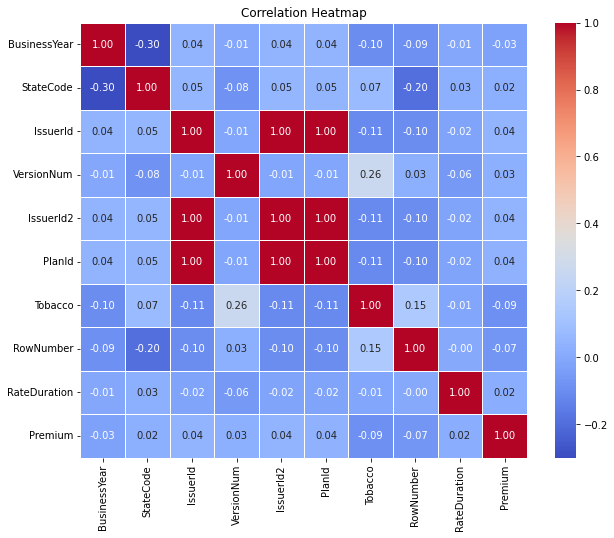

In [38]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 8))
corr = df.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

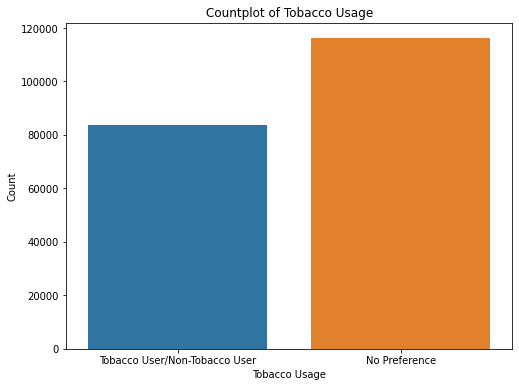

In [39]:
# 2. Countplot of Tobacco Usage
plt.figure(figsize=(8, 6))
sns.countplot(x='Tobacco', data=rate_df)
plt.title('Countplot of Tobacco Usage')
plt.xlabel('Tobacco Usage')
plt.ylabel('Count')
plt.show()

In [40]:
df['SourceName']=label_encoder.fit_transform(df['SourceName'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199489 entries, 1049554 to 3265533
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   BusinessYear  199489 non-null  int64  
 1   StateCode     199489 non-null  int32  
 2   IssuerId      199489 non-null  int64  
 3   SourceName    199489 non-null  int32  
 4   VersionNum    199489 non-null  int64  
 5   IssuerId2     199489 non-null  int64  
 6   PlanId        199489 non-null  int32  
 7   RatingAreaId  199489 non-null  object 
 8   Tobacco       199489 non-null  int32  
 9   Age           199489 non-null  object 
 10  RowNumber     199489 non-null  int64  
 11  RateDuration  199489 non-null  int64  
 12  Premium       199489 non-null  float64
dtypes: float64(1), int32(4), int64(6), object(2)
memory usage: 18.3+ MB


In [42]:
# Convert 'Age' and 'RatingAreaId' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['RatingAreaId'] = pd.to_numeric(df['RatingAreaId'], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199489 entries, 1049554 to 3265533
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   BusinessYear  199489 non-null  int64  
 1   StateCode     199489 non-null  int32  
 2   IssuerId      199489 non-null  int64  
 3   SourceName    199489 non-null  int32  
 4   VersionNum    199489 non-null  int64  
 5   IssuerId2     199489 non-null  int64  
 6   PlanId        199489 non-null  int32  
 7   RatingAreaId  199489 non-null  int64  
 8   Tobacco       199489 non-null  int32  
 9   Age           199489 non-null  int64  
 10  RowNumber     199489 non-null  int64  
 11  RateDuration  199489 non-null  int64  
 12  Premium       199489 non-null  float64
dtypes: float64(1), int32(4), int64(8)
memory usage: 18.3 MB


In [44]:
df.isnull().sum()

BusinessYear    0
StateCode       0
IssuerId        0
SourceName      0
VersionNum      0
IssuerId2       0
PlanId          0
RatingAreaId    0
Tobacco         0
Age             0
RowNumber       0
RateDuration    0
Premium         0
dtype: int64

In [45]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,IssuerId2,PlanId,RatingAreaId,Tobacco,Age,RowNumber,RateDuration,Premium
1049554,2014,10,50816,0,9,50816,2803,11,1,48,15636,91,1279.32
214510,2014,5,16842,0,6,16842,395,56,1,32,10376,364,770.42
2145764,2014,8,60597,2,9,60597,3675,3,1,54,2670,364,1225.00
2198867,2014,33,38166,0,5,38166,1882,16,0,47,7033,90,506.95
1184366,2014,27,26065,0,4,26065,876,39,1,38,3896,364,749.23


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop(columns=['Premium'])  # Drop non-numeric or target columns
y = df['Premium']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [47]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, R2: {r2_lr}")

Linear Regression - RMSE: 108583.49624735814, MAE: 27963.902857411736, R2: 0.01905370000361295


In [48]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt)}")


Decision Tree Performance:
Mean Squared Error: 150412463.6073313
R^2 Score: 0.987485848293765


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_knn)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_knn)}")


In [ ]:
# Save the model and label encoders
with open('knn_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('label_encoder_state.pkl', 'wb') as file:
    pickle.dump(label_encoder_state, file)

with open('label_encoder_source.pkl', 'wb') as file:
    pickle.dump(label_encoder_source, file)

with open('label_encoder_tobacco.pkl', 'wb') as file:
    pickle.dump(label_encoder_tobacco, file)